# Genre Classification on Spotify dataset



In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import warnings
warnings.warn("first example of warning!", DeprecationWarning)
from sklearn import linear_model  # will be using for plotting trend line
from sklearn.preprocessing import MinMaxScaler,StandardScaler # for normalizing data
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from sklearn import metrics

%matplotlib inline

c:\users\farid\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:

first example of warning!



### Load the genres data


In [36]:
genres=pd.read_csv("data_by_genres.csv")
display(genres.head())

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


### Keys of data


In [37]:
print(f"Keys of genres \n {genres.keys()}")

Keys of genres 
 Index(['genres', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode'],
      dtype='object')


### Shape of data


In [38]:
genres.shape


(2664, 14)

### Description of the data types

In [39]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2664 non-null   object 
 1   acousticness      2664 non-null   float64
 2   danceability      2664 non-null   float64
 3   duration_ms       2664 non-null   float64
 4   energy            2664 non-null   float64
 5   instrumentalness  2664 non-null   float64
 6   liveness          2664 non-null   float64
 7   loudness          2664 non-null   float64
 8   speechiness       2664 non-null   float64
 9   tempo             2664 non-null   float64
 10  valence           2664 non-null   float64
 11  popularity        2664 non-null   float64
 12  key               2664 non-null   int64  
 13  mode              2664 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 291.5+ KB


### Correlation of the data

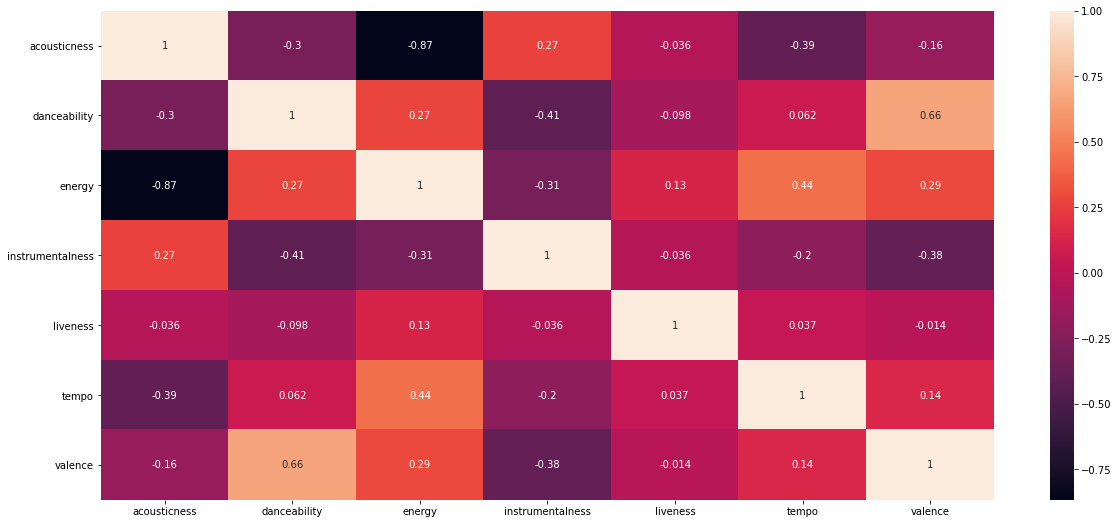

In [40]:
import seaborn as sns

pd.set_option("max_columns",None)

def heatmap(mylist):
    plt.figure(figsize=(20,9))
    sns.heatmap(mylist, annot=True)

corr = genres[['acousticness','danceability','energy',
'instrumentalness','liveness','tempo','valence']].corr()

heatmap(corr)

### Each feature scatter matrix

In [41]:
import plotly.express as px
fig=px.scatter_matrix(genres.drop(["key","mode"],axis=1),width=1200,height=1600)
fig.show()

### 3 Feature representation

In [42]:
fig=px.scatter(genres,x='liveness',y='tempo',color='energy')

fig.update_layout(title="3 feature representation")

fig.show()

### 4 feature representation



In [43]:
fig=px.scatter_3d(genres,x='tempo',y='liveness',z='loudness',color='energy')

fig.update_layout(title="4 feature representation")
fig.show()


### Standardize the data to have a mean of ~0 and a variance of 1

In [46]:
X=genres.drop(["genres","key","mode","popularity"],axis=1)
X_std = StandardScaler().fit_transform(X)


### Create PCA instance


In [47]:
pca=PCA(n_components=10)
components=pca.fit_transform(X_std)


### Plot the components

([<matplotlib.axis.XTick at 0x2e10a197948>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

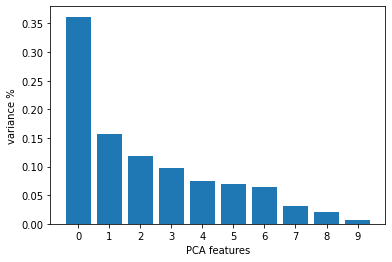

In [48]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

### Save components to a DataFrame

In [49]:
PCA_components = pd.DataFrame(components)
display(PCA_components)

,0,1,2,3,4,5,6,7,8,9
0,3.453094,3.837400,1.647900,6.523372,-0.188429,2.751917,2.354609,-1.022995,-0.276311,0.108112
1,0.939702,-0.816997,0.487320,-0.350933,0.106910,0.075054,0.062938,-0.065438,-0.167267,-0.033375
2,0.733921,-1.277626,-0.391863,-0.103585,0.703464,-0.566472,0.500789,0.317726,0.088401,-0.020697
3,1.800092,1.553961,-0.757943,1.064467,-0.015882,0.425881,-1.315374,0.329625,-0.043886,-0.115509
4,-0.928962,-0.787846,-0.416946,0.919831,0.145792,-0.175664,-1.110583,0.066229,-0.605575,-0.221673
...,...,...,...,...,...,...,...,...,...,...
2659,-0.497740,0.060185,-0.208052,0.215071,-0.136683,0.373846,0.039601,-0.144672,0.608092,0.005068
2660,-1.732548,-1.841069,-1.034557,1.681710,-0.408856,0.896363,-0.154344,-0.308416,1.247091,0.402090
2661,-0.718801,-1.329566,-1.295002,1.576293,-1.307162,0.348462,-0.528342,-0.363056,0.350471,0.023836
2662,-0.634577,-1.576894,-1.923307,1.492984,-1.634922,0.322411,-1.896601,-0.584151,1.072522,0.005950


### Scatter plot of the first two components of the PCA model.

Text(0, 0.5, 'PCA 2')

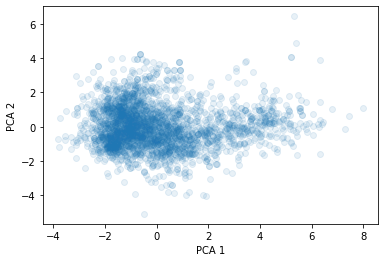

In [50]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

### Kmeans algorithm

In [51]:
ks = range(2, 20)
inertias = []
silhouttes=[]
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    labels=model.labels_
    print(k,metrics.silhouette_score(PCA_components,labels,metric='euclidean'))
    
    



2 0.3308172275234469
3 0.179267467991266
4 0.16924673685989616
5 0.17611830439628157
6 0.18080434596079667
7 0.18560065752577526
8 0.18228364707264083
9 0.14183231900137824
10 0.14891546453263077
11 0.1449951255696627
12 0.1364814301780062
13 0.13882329552594777
14 0.1470500246631749
15 0.14098150082901026
16 0.13043315971680042
17 0.13485606427460933
18 0.13173446419232868
19 0.11863350530712913


### Visualize

In [52]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=np.arange(1,20),y=inertias))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[1,20],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=10,
            y=inertias[9],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

### Apply KMeans

In [53]:
km=KMeans(n_clusters=10)

predicted_genres=km.fit_predict(PCA_components)


In [54]:
genres["Predicted_genres"]=predicted_genres
genres["Predicted_genres"]=genres["Predicted_genres"].apply(lambda x: 'Genre'+str(x))



37      Genre6
99      Genre2
110     Genre6
202     Genre3
265     Genre7
320     Genre6
419     Genre3
436     Genre6
565     Genre3
687     Genre6
694     Genre9
769     Genre6
845     Genre2
943     Genre2
1096    Genre2
1279    Genre8
1633    Genre6
1639    Genre3
1691    Genre7
1759    Genre6
2021    Genre3
2059    Genre8
2076    Genre2
2154    Genre3
2286    Genre0
2434    Genre2
2620    Genre8
Name: Predicted_genres, dtype: object

In [56]:
genres.sample(10)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,Predicted_genres
1972,pop romantico,0.474603,0.520349,213746.871069,0.505319,0.007282,0.219334,-9.768435,0.040396,110.715645,0.551585,40.447794,7,1,Genre7
2318,stomp pop,0.117925,0.644440,213036.094402,0.783167,0.038772,0.199324,-4.688088,0.063682,119.998429,0.532496,53.622830,7,1,Genre6
1879,oth indie,0.078800,0.668000,220293.000000,0.914000,0.746000,0.214000,-5.242000,0.046200,110.796000,0.778000,37.000000,8,1,Genre0
2350,swedish doom metal,0.000218,0.219556,418610.555556,0.831667,0.030825,0.130133,-4.667444,0.067433,113.517667,0.200133,34.666667,4,1,Genre2
1521,lund indie,0.700500,0.430000,230047.000000,0.415500,0.280900,0.177500,-10.444000,0.033350,128.666000,0.323950,38.000000,9,1,Genre7
2290,space ambient,0.529811,0.384933,278716.555556,0.339478,0.850500,0.091161,-12.585778,0.045867,95.354944,0.155928,47.722222,4,1,Genre3
1394,jazz quartet,0.714597,0.536674,306626.821214,0.297599,0.211927,0.209679,-15.445191,0.078288,114.944253,0.533138,23.061305,5,1,Genre7
2266,sound team,0.111605,0.483000,238380.250000,0.785412,0.113602,0.192050,-7.761750,0.080375,110.199500,0.585625,44.125000,2,1,Genre6
905,epicore,0.266797,0.475058,234193.044782,0.572087,0.516533,0.135313,-10.963069,0.063095,118.033979,0.316371,51.464701,7,1,Genre9
907,escape room,0.176733,0.669104,230981.142874,0.655139,0.067127,0.203733,-6.894150,0.157625,120.622105,0.489923,55.705824,0,1,Genre8


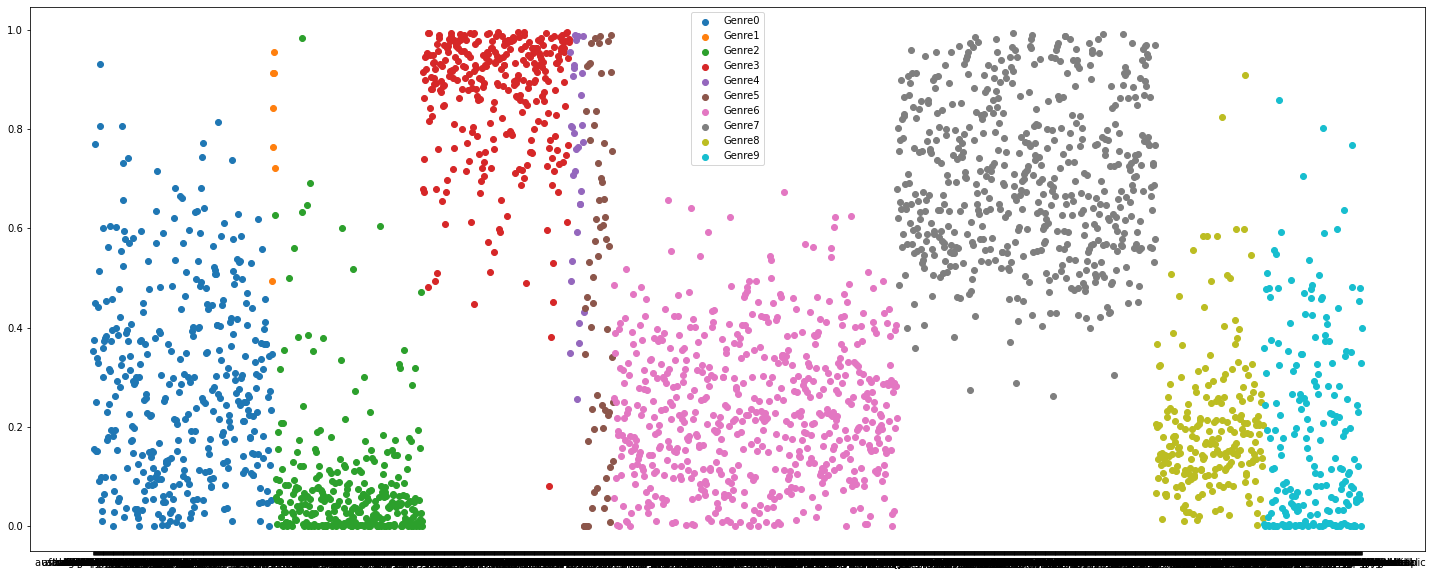

In [57]:
labels=np.unique(predicted_genres)
genres=np.array(genres)

plt.figure(figsize=(25,10))
for i in labels:
    plt.scatter(genres[predicted_genres==i,0],genres[predicted_genres==i,1],label="Genre"+str(i))

plt.legend()
plt.show()


### Getting Validation Data


In [21]:
validation_genres=pd.read_csv("data_each_genres.csv")
validation_genres

,Unnamed: 0,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,0,"""Cats"" 1981 Original London Cast",0.190466,-0.577296,0.080771,-0.423451,-0.492733,0.599422,-0.512587,0.728019,0.021651,-0.746385,0.167910,5,1,12,show tunes
1,1,"""Weird Al"" Yankovic",-0.886229,0.683578,-0.159728,0.754944,-0.570338,-0.295508,0.231051,-0.118793,0.678476,0.979750,-0.027445,9,1,132,antiviral pop
2,2,"""Weird Al"" Yankovic",-0.886229,0.683578,-0.159728,0.754944,-0.570338,-0.295508,0.231051,-0.118793,0.678476,0.979750,-0.027445,9,1,132,comedy rock
3,3,"""Weird Al"" Yankovic",-0.886229,0.683578,-0.159728,0.754944,-0.570338,-0.295508,0.231051,-0.118793,0.678476,0.979750,-0.027445,9,1,132,comic
4,4,"""Weird Al"" Yankovic",-0.886229,0.683578,-0.159728,0.754944,-0.570338,-0.295508,0.231051,-0.118793,0.678476,0.979750,-0.027445,9,1,132,parody
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64087,64087,黃品源,0.098297,0.190741,0.465804,-0.629850,-0.570476,-0.970003,-0.129141,-0.598644,0.815275,-1.122184,0.575073,9,0,2,c-pop
64088,64088,黃品源,0.098297,0.190741,0.465804,-0.629850,-0.570476,-0.970003,-0.129141,-0.598644,0.815275,-1.122184,0.575073,9,0,2,classic cantopop
64089,64089,黃品源,0.098297,0.190741,0.465804,-0.629850,-0.570476,-0.970003,-0.129141,-0.598644,0.815275,-1.122184,0.575073,9,0,2,classic mandopop
64090,64090,黑豹,-0.334384,-1.086954,0.650302,0.758350,-0.570497,-1.046262,0.364211,-0.488358,3.377364,-0.674185,-0.013051,11,1,2,chinese indie


In [58]:
X=validation_genres.drop(["Unnamed: 0","artists","count","key","mode","genres","popularity"],axis=1)
validation_genres["predicted"]=km.fit_predict(X)
validation_genres["predicted"]=["Genre"+str(x) for x in validation_genres["predicted"]]
validation_genres

ValueError: could not convert string to float: 'Genre8'

In [ ]:
validation_genres.sample(20)

In [59]:
total_true_predicted=0
genres
validation_genres.loc[(validation_genres['genres'] == "indie folk")]["predicted"]
    
validation_genres.shape
validation_genres.keys()




    


Index(['Unnamed: 0', 'artists', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key', 'mode', 'count', 'genres',
       'predicted'],
      dtype='object')

In [60]:
data=pd.read_csv("data.csv")
display(data)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [61]:
X=data.drop(["artists","id","name","year","release_date","year","popularity","explicit",'key',"mode"],axis=1)
data["predicted"]=km.fit_predict(X)

data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,predicted
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,2
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,1
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,0
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,2
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020,2
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020,2
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020,2
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020,2


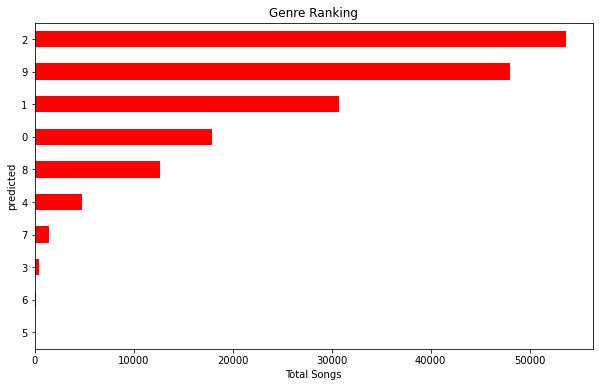

In [62]:
genres_grp = data.groupby(['predicted']).size()
plt.figure(figsize=(10,6))
genres_grp.sort_values(ascending=True).plot.barh(color='red')
plt.xlabel('Total Songs')
plt.title('Genre Ranking')
plt.show()

In [85]:

print(data.loc[(data['id'] == "52eycxprLhK3lPcRLbQiVk")]["predicted"].iloc[0])

genres[893][14]


2


'Genre2'